# Машинное обучение, ВМК МГУ #

## Практическое задание 2. EM-алгоритм ## 
### Общая информация ###
Дата выдачи: 22.03.2021

Мягкий дедлайн: 11.04.2021 23:59 MSK

Жёсткий дедлайн: 18.04.2021 23:59 MSK

### Оценивание и штрафы ### 
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимальная оценка за работу (без учёта бонусов) — 10 баллов.

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи !!ВАЖНО!!!###
Задания сдаются через систему anytask. Посылка должна содержать:

* Ноутбук homework-practice-09-em-Username.ipynb
* Модули preprocessing.py, metrics.py, models.py, содержащие написанный вами код
* Ссылки на посылки в Яндекс.Контест для всех функций и классов, которые вы реализовали

Ссылка на Яндекс.Контест: https://contest.yandex.ru/contest/25534

Username — ваша фамилия и имя на латинице именно в таком порядке

Напоминание об оформлении и выполнении ноутбука

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). В противном случае -1 балл
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. В противном случае -0.5 балла

_____________________________________________________________________________________________________________________________

* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и поэтому будем снижать баллы
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.


_______________________________________________________________________________________________________________________________

* Про графики. Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать

    * должно быть название (plt.title) графика; В противном случае – -0.05 балла
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); В противном случае – -0.025 балла за каждую ось
    * должны быть подписаны единицы измерения (если это возможно); В противном случае – -0.025 балла за каждую ось
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; В противном случае – -0.05 балла
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; В противном случае – -0.025 балла за каждую ось
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); В противном случае – -0.05 балла
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); В противном случае – -0.05 балла
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.

### Generative model of Labels, Abilities, and Difficulties (GLAD)###

В <a href="https://github.com/esokolov/ml-course-hse/blob/master/2020-spring/seminars/sem15-em.pdf">семинаре 15</a> мы рассмотрели задачу восстановления истинной разметки по меткам от экспертов (которым мы не можем доверять в полной мере, более того, их предсказания могут расходиться).

Рассмотрим следующую вероятностную модель:

$$ p(L, Z | \alpha, \beta) = \prod_{i=1}^{n} \prod_{j=1}^m \sigma(\alpha_j\beta_i)^{[l_{ij}=z_i]}\sigma(-\alpha_j\beta_i)^{1-[l_{ij}=z_i]} p(z_j)$$
где $l_{ij} -$ ответ $j$-го эксперта на задачу $i$, $z_j -$ истинная разметка, $\alpha_j, \beta_i-$ уровень экспертизы и сложность задачи соответственно. Для более подробного описания модели можно прочитать материалы семинара, а также <a href="http://papers.nips.cc/paper/3644-whose-vote-should-count-more-optimal-integration-of-labels-from-labelers-of-unknown-expertise.pdf">оригинальную статью</a>. Априорное распределение положим равномерным: $p(z_i) = 0.5$.

In [75]:
import numpy as np
seed = 0xDEADF00D
np.random.seed(seed)

In [76]:
from google.colab import drive

In [77]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [78]:
#("/content/gdrive/MyDrive/Colab Notebooks/people_data/train/1.jpg"

In [79]:
L = np.load('/content/gdrive/MyDrive/Colab Notebooks/supp_files_em_09/L.npy')
n, m = L.shape
print(f"Число задач (n_problems): {n}, число экспертов (n_experts): {m}")


Число задач (n_problems): 2000, число экспертов (n_experts): 20


_______________________________________________________________________________________________________________________________

**Задание 1. (2 балла)** Реализуйте EM-алгоритм для заданной выше модели. Вы можете воспользоваться предложенными шаблонами или написать свои.

Обратите внимание, что правдоподобие моделирует не вероятность метки $l_{ij}$ принять значение 1 или 0, а вероятность того, что она равна скрытой переменной $z_i$, т.е. $p(l_{ij} = z_j|z_j, \alpha_j, \beta_i) \neq p(l_{ij} = 1|\alpha_j, \beta_i) $. При этом заранее неизвестно, какая из скрытых переменных соответствует метке 1. Не забывайте, что параметры $\beta_i$ должны быть неотрицательными; для этого оптимизируйте $\log \beta$. На M-шаге можете использовать как один шаг градиентного спуска, так и несколько: разумные результаты у вас должны получаться вне зависимости от числа итераций.

**Подсказки:**

* При работе с вероятностями не забывайте о точности:
* Используйте логарифмы вероятностей.
* $\log \sigma(a)$ лучше преобразовать в $\log \sigma(a) = -\log(1 + \exp(-a)) = -\mathrm{softplus}(-a) $
* Ещё полезные функции: scipy.special.expit, scipy.special.logsumexp, np.log1p
* Для отладки может быть полезно проверить градиенты, возвращаемые функциями alpha_grad_lb и logbeta_grad_lb с помощью scipy.optimize.check_grad.
* Размеры возвращаемых значений, указанные в докстринге функций могут помочь вам понять, что необходимо возвращать
* Почитайте докстринги, в них есть подсказки и ссылки на формулы из семинара

_______________________________________________________________________________________________________________________________

In [ ]:
def softplus(x):
    '''stable version of log(1 + exp(x))'''
    c = (x > 20) * 1.
    return np.log1p(np.exp(x * (1-c)) * (1-c)) + x * c

In [ ]:
res = np.array([1, 2, 3])
res = res[:, np.newaxis]
r2 = np.array([2, 2, 1])[ np.newaxis, :]
res

array([[1],
       [2],
       [3]])

In [ ]:
res = np.array([1, 2, 3])[ np.newaxis, :]
a =  np.array([2, 2, 2])[ np.newaxis, :]
mm= (res == 0)
print(res)
print(a)
d = np.concatenate((res, a))
#rint(d)
d[1,:]

[[1 2 3]]
[[2 2 2]]


array([2, 2, 2])

In [ ]:
from scipy.special import expit

def posterior(alpha, beta, L):
    """ Posterior over true labels z p(z|l, \alpha, \beta)
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
    Returns:
        ndarray of shape (2, n_problems)
        (2 -- for z = 0 and for z = 1, n_problems -- for each problem in data)
    Tip:
        You may use function log_likelihood here
        See page 7 of seminar, the last formula for details
    """
    #print('start')
    beta =  beta[:, np.newaxis]
    #print('softplus', -softplus(-alpha * beta))
    #print('alff , beta',-alpha , beta )
    # print('-alfa * beta',-alpha * beta )
    
    summ = ((-softplus(-alpha * beta)*((L == 0)) + (-softplus(alpha * beta)*(L==1))))
    
    # print('summ', summ.shape, summ)
    
    zero =  np.exp(np.sum(summ , axis = 1))
    first = np.exp(np.sum(((-softplus(-alpha * beta)*((L == 1)) + (-softplus(alpha * beta)*(L==0)))), axis = 1))
    
    zero_res = zero / (zero + first)
    first_res = first / (zero + first)
    
    # print('zero',zero.shape)
    # print('first',first.shape)
    # print('postreor', (np.concatenate((zero_res[np.newaxis, :], first_res[np.newaxis, :]), axis = 0)).shape)
    return np.concatenate((zero_res[np.newaxis, :], first_res[np.newaxis, :]), axis = 0)

def log_likelihood(alpha, beta, L, z):
    """ p(l=z|z, \alpha, \beta)
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        z: ndarray of shape (n_problems).
    Returns:
        ndarray of shape (n_problems,)
    Tips:
        See page 7 of seminar, the second formula for details
    """
    beta = beta[:, np.newaxis]
    return -1 *softplus(-alpha * beta)
    

def alpha_grad_lb(alpha, beta, L, q):
    """ Gradient of lower bound wrt alpha
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        q: ndarray of shape (2, n_problems).
    Returns:
        ndarray of shape (n_experts,)
    Tips:
        See pages 8-9 of seminar for details
    """
    #print('alpha', alpha.shape)
    beta = beta[:, np.newaxis]
    summ1 = ( q[0][:, np.newaxis] * beta * ((L == 0) * expit(-alpha * beta) - (L == 1)*expit(alpha*beta)) )
    summ2 = ( q[1][:, np.newaxis] * beta * ((L == 1) * expit(-alpha * beta) - (L == 0)*expit(alpha*beta)) )
    summ = (summ1 + summ2)
    #print('alf',summ.shape)
    #print('alf ret', np.sum(summ ,axis = 0).shape)
    return np.sum(summ ,axis = 0)


def logbeta_grad_lb(alpha, beta, L, q):
    """ Gradient of lower bound wrt alpha
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        q: ndarray of shape (2, n_problems).
    Returns:
        ndarray of shape (n_problems,)
    Tips:
        See pages 8-9 of seminar for details
    """
    beta = beta[:, np.newaxis]
    summ1 = ( q[0][:, np.newaxis] * alpha * ((L == 0)*expit(-alpha*beta) - (L == 1)*expit(alpha*beta)) )
    summ2 = ( q[1][:, np.newaxis] * alpha * ((L == 1)*expit(-alpha*beta) - (L == 0)*expit(alpha*beta)) )
    summ =  beta*(summ1 +  summ2)
    #print('btt', summ.shape)
    #print('bet ret', np.sum(summ ,axis = 1).shape)
    return np.sum(summ ,axis = 1)


def lower_bound(alpha, beta, L, q):
    """ Lower bound
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        q: ndarray of shape (2, n_problems).
    Returns:
        single value, number
    Tips:
        You may use function log_likelihood here
        See page 8 of seminar, the fourth formula for details
    """
    beta = beta[:, np.newaxis]
    summ1 = (q[0][:, np.newaxis]*((L == 0)*(-softplus(-alpha*beta)) +( L==1)*(-softplus(alpha*beta))))
    summ2 = (q[1][:, np.newaxis]*((L == 1)*(-softplus(-alpha*beta)) + (L==0)*(-softplus(alpha*beta))))
    summ =  summ1 + summ2 
    #print('lb', summ.shape)
    return np.sum(summ)

**Подсказка:**

* При проверке alpha значения, выдываемые функцией check_grad должны быть не более 0.01. Иначе у вас где-то ошибка
* При проверке logbeta значения, выдываемые функцией check_grad должны быть не более 0.05. Иначе у вас где-то ошибка

In [ ]:
from scipy.optimize import check_grad
from scipy.special import expit

alpha, logbeta = np.random.randn(m), np.random.randn(n)
beta = np.exp(logbeta)
q = np.ones((2, len(beta))) * 0.5

check_grad(
    lambda a: lower_bound(a, beta, L, q),
    lambda a: alpha_grad_lb(a, beta, L, q),
    alpha
)

0.0011961236591178017

In [ ]:
check_grad(
    lambda lb: lower_bound(alpha, np.exp(lb), L, q),
    lambda lb: logbeta_grad_lb(alpha, np.exp(lb), L, q),
    logbeta
)

0.010685580565164365

In [ ]:
def em(L, n_steps=1000, lr=1e-3):
    # initialize parameters
    alpha, logbeta = np.random.randn(m), np.random.randn(n)
    q = np.ones((2, len(beta))) * 0.5

    for step in range(n_steps):
        q = posterior(alpha, np.exp(logbeta), L) # E
        for i in range (1):   
          alpha_grad = alpha_grad_lb(alpha, np.exp(logbeta), L, q) #M
          logbeta_grad = logbeta_grad_lb(alpha, np.exp(logbeta), L, q)
          #if step %100 == 0:
          #    print('q', q)
          #   print('alpha_grad', alpha_grad)
          #    print('logbeta_grad', logbeta_grad)
          alpha += 1 * alpha_grad * lr
          logbeta += 1 * logbeta_grad * lr

    return alpha, np.exp(logbeta), q

In [ ]:
alpha, beta, q = em(L)

In [ ]:
print(alpha)
print(beta)
print(q)

[-0.70064594 -0.86990536 -6.48396456 -0.411526   -0.69447666 -6.30521342
 -0.70322342 -5.73652255  6.133645   -0.73439308  6.51892329  6.28551216
 -6.12259475 -0.43980089 -0.73101802 -0.3798579  -0.73689334 -6.01234996
  5.85590994 -5.88247736]
[0.88592947 1.17736387 1.87386245 ... 0.21143664 0.81980037 1.10838062]
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.99445180e-01
  2.98752780e-23 1.15870389e-31]
 [1.01968555e-24 6.34765228e-34 8.73194772e-55 ... 5.54819545e-04
  1.00000000e+00 1.00000000e+00]]


_______________________________________________________________________________________________________________________________


**Задание 2. (1 балл)** Загрузите настоящую разметку. Посчитайте accuracy разметки, полученной с помощью обычного голосования по большинству среди экспертов, и сравните его с качеством, полученным с помощью EM-алгоритма.

**Разбалловка:**

* 0.5 балла -- качество голосования не менее 0.904
* 0.5 балла -- качестве EM не менее 0.95

**Подсказка:**

* Помните, что алгоритму не важно, какая метка 0, а какая 1, поэтому если получите качество <0.5, то просто поменяйте метки классов (не забудьте также поменять знак у $\alpha$).

In [ ]:
y = np.load('/content/gdrive/MyDrive/Colab Notebooks/supp_files_em_09/y.npy')
# (∩ ￣ー￣)⊃ ✳✨✳✨✳✨✳

In [ ]:
y.shape

(2000,)

In [ ]:
L.shape

(2000, 20)

In [ ]:
check = np.sum(L, axis = 1) > 10

In [ ]:
(check == y).mean()

0.904

In [ ]:
(np.argmin(q, axis = 0) == y).mean()

0.9545

In [ ]:
#(np.argmin(q, axis = 0) == y).mean()

0.9545 > 0.95

0.904 = 0.904

все хорошо

___

**Задание 3. (0.5 балла)** Попробуйте проинтерпретировать полученные коэфициенты $\alpha$. Есть ли в выборке эксперты, которые намеренно голосуют неверно? Как это можно понять по альфам? Продемонстрируйте, что эксперты действительно чаще голосуют за неверный класс. Отобразите визуализацию зависимости доли врено размеченных экспертом объектов от коэффициента $\alpha$. Прокомментируйте результаты и полученную зависимость.

**Подсказки:**

* Если вы отобразили или хотели отобразить зависимость при помощи обычного plot (график), то посмотрите повнимательнее/подумайте, почему это не очень хорошая визуализация. Для возможности получения полного балла правильно будет использовать тип отображения scatter plot.
* Также для возможности получения полного балла вам необходимо проинтерпретировать смысл зависимости для всех групп альф, которые вы увидите (спойлер: их должно быть 3:)

___

In [ ]:
alp = -1 * alpha
alp

array([ 0.70064594,  0.86990536,  6.48396456,  0.411526  ,  0.69447666,
        6.30521342,  0.70322342,  5.73652255, -6.133645  ,  0.73439308,
       -6.51892329, -6.28551216,  6.12259475,  0.43980089,  0.73101802,
        0.3798579 ,  0.73689334,  6.01234996, -5.85590994,  5.88247736])

In [ ]:
L.shape

(2000, 20)

In [ ]:
y.shape

(2000,)

In [ ]:
true_predict = np.sum(L == y[:, np.newaxis], axis = 0)

In [ ]:
true_predict.shape

(20,)

In [ ]:
true_predict

array([1394, 1418, 1838, 1349, 1393, 1834, 1372, 1813,  181, 1408,  165,
        164, 1822, 1362, 1367, 1358, 1403, 1818,  176, 1821])

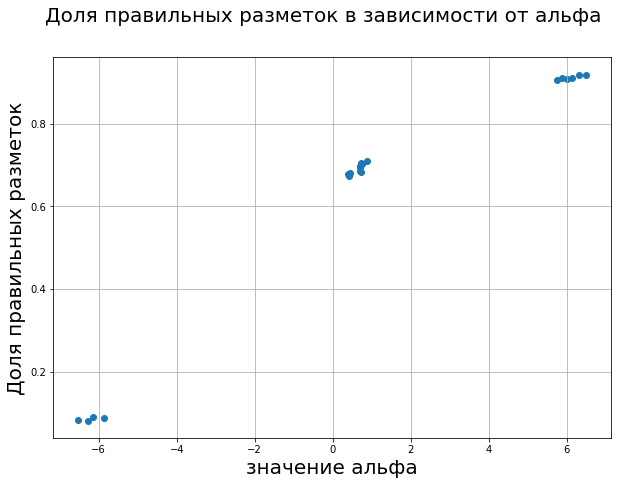

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
y1 = true_predict / 2000
x1 = alp

ax.scatter(x1, y1)


fig.suptitle('Доля правильных разметок в зависимости от альфа', fontsize= 20)
ax.set_xlabel('значение альфа', size = 20)
ax.set_ylabel('Доля правильных разметок', size = 20)
#ax.legend()
ax.grid()
#plt.ylim(0, 1.2)
#plt.xlim(0, 15)
fig.set_figwidth(10)    
fig.set_figheight(7) 
#plt.legend(prop={'size': 15})

plt.show()

видно, что все эксперты разбились на три класса, и у кого большие альфа, у тех больше доля правильных ответов

Те эксперты, у которых маленькие значения альфа намеренно дают неправильные ответы, потому что доля правильных ответов у них на уровне 0.1

### Выравнивание слов (Word Alignment)### 


EM-алгоритм также применяют на практике для настройки параметров модели выравнивания слов, более сложные модификации которой используются в статистическом машинном переводе. Мы не будем подробно обсуждать применение word alignment для перевода и ограничимся следующей целью: пусть у нас есть параллельный корпус из предложений на исходном языке и их переводов на целевой язык (в этом задании используются английский и чешский соответственно).

Первая задача — определить с помощью этого корпуса, как переводится каждое отдельное слово на целевом языке. Вторая задача — для произвольной пары из предложения и его перевода установить, переводом какого слова в исходном предложении является каждое слово в целевом предложении. Оказывается, у обеих задач существует элегантное и эффективное решение при введении правильной вероятностной модели: в этой части задания вам предстоит его реализовать и оценить результаты работы. Но обо всём по порядку :)

___

Перед тем, как заниматься машинным обучением, давайте разберёмся с данными и метриками в интересующей нас задаче. В ячейке ниже загружается и разархивируется параллельный английско-чешский корпус, в котором есть разметка выравнивания слов. Нетрудно заметить, что формат XML-файла, использованный его авторами, не вполне стандартный: нет готовой команды , которая позволила бы получить список пар предложений вместе с выравниваниями. Это значит, что нужно разобраться с форматом и написать парсер самостоятельно, используя встроенные средства Python, например, модуль xml.

In [80]:
%%bash
wget -q https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-1804/CzEnAli_1.0.tar.gz -O CzEnAli_1.0.tar.gz
mkdir -p data
tar -xzf CzEnAli_1.0.tar.gz -C data/
head -n 20 data/merged_data/project_syndicate/project_syndicate_bacchetta1.wa

<?xml version="1.0" encoding="utf-8" ?>
<sentences>
<s id="project_syndicate_bacchetta1-s1">
  <english>Are the Dollar 's Days Numbered ?</english>
  <czech>Jsou dny dolaru sečteny ?</czech>
  <sure>1-1 3-3 5-2 6-4 7-5</sure>
  <possible>2-2 4-3</possible>
</s>
<s id="project_syndicate_bacchetta1-s2">
  <english>Philippe Bacchetta and Eric van Wincoop</english>
  <czech>Philippe Bacchetta and Eric van Wincoop</czech>
  <sure>1-1 2-2 3-3 4-4 5-5 6-6</sure>
  <possible></possible>
</s>
<s id="project_syndicate_bacchetta1-s3">
  <english>A year ago , the dollar bestrode the world like a colossus .</english>
  <czech>Ještě před rokem dolar dominoval světu jako imperátor .</czech>
  <sure>10-7 12-8 13-9 2-3 3-2 6-4 7-5 9-6</sure>
  <possible>1-3 11-8 3-1 5-4 8-6</possible>
</s>


**Задание -2. (0.5 балла)** Реализуйте функцию extract_sentences, которая принимает на вход путь к файлу с XML-разметкой, используемой в этом датасете, и возвращает список параллельных предложений, а также список из «уверенных» (sure) и «возможных» (possible) пар выравниваний. Отправьте вашу реализацию в Яндекс.Контест, чтобы убедиться в её корректности; в следующей ячейке ноутбука соберите все пары размеченных предложений из датасета в два списка all_sentences (список SentencePair) и all_targets (список LabeledAlignment).

**Подсказка:**

Возможно у вас не будут проходить тесты, но вы не будете понимать, в чем же дело:) Попробуйте в таком случае заменить & на `&amp;` или 
`&#038;` https://stackoverflow.com/questions/17423495/how-to-solve-ampersand-conversion-issue-in-xml

**Замечание:**

* **Полностью проходящая все тесты посылка в этом заданиии дает 0.5 балла. За непроходящий хотя бы 1 тест вы получите 0 баллов.**
* Здесь и далее соблюдайте сигнатуры функций и пользуйтесь объявленными в модуле preprocessing.py классами для организации данных. Стоит заметить, что предложения уже токенизированы (даже отделена пунктуация), поэтому предобработку текстов совершать не нужно. Обратите внимание на формат хранения выравниваний: нумерация начинается с 1 (в таком виде и нужно сохранять), первым в паре идёт слово из англоязычного предложения.

___

https://contest.yandex.ru/contest/25534/run-report/50589578/

In [81]:
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')

In [82]:
import preprocessing
import glob
from preprocessing import extract_sentences

all_sentences = []
all_targets = []
# (´◕▽◕)⊃━☆

In [83]:
for file in glob.glob('/content/data/*/*/*.wa'):
  check1, check2 = extract_sentences(file)
  all_sentences += check1
  all_targets += check2

In [84]:
#all_sentences

In [85]:
len(all_sentences)

7503

In [86]:
len(all_targets)

7503

In [87]:
#all_sentences[:10]

In [88]:
#all_targets[:10]

In [89]:
#prob = extract_sentences('/content/data/merged_data/project_syndicate/project_syndicate_blo3.wa')

In [90]:
#prob

**Задание -1. (0.5 балла)** Реализуйте функции get_token_to_index и tokenize_sents из модуля preprocessing.py, постройте словари token->index для обоих языков и постройте список из TokenizedSentencePair по выборке. Реализации функций также отправьте в Яндекс.Контест.

**Замечание:**

* Полностью проходящая все тесты посылка в этом заданиии дает 0.5 балла. За непроходящий хотя бы 1 тест вы получите 0 баллов.

https://contest.yandex.ru/contest/25534/run-report/50652176/

In [91]:
prob = extract_sentences('/content/data/merged_data/project_syndicate/project_syndicate_blo3.wa')

In [92]:
#tokenize_sents([SentencePair(['a2', 'bbb', 'c'],[ 'CCC', 'aaa', 'bbb']), SentencePair(['a2', 'a2', 'c2'], ['bbb', 'cjd2', 'sky2'])], s[0], s[1])

In [93]:
#all_sentences

In [94]:
import importlib
importlib.reload(preprocessing)

<module 'preprocessing' from '/content/gdrive/MyDrive/Colab Notebooks/preprocessing.py'>

In [95]:
from preprocessing import get_token_to_index, tokenize_sents

t_idx_src, t_idx_tgt = get_token_to_index(all_sentences)
tokenized_sentences = tokenize_sents(all_sentences, t_idx_src, t_idx_tgt)

In [96]:
#t_idx_tgt

In [97]:
#tokenized_sentences

In [98]:
len(t_idx_src)

9049

In [99]:
#tokenized_sentences

In [100]:
len(t_idx_tgt)

15002

В качестве бейзлайна для этой задачи мы возьмём способ выравнивания слов по коэффициенту Дайса: слово в исходном языке является переводом слова на целевом языке, если они часто встречаются в одних и тех же предложениях и редко встречаются по отдельности. 

Математически это записывается по аналогии с мерой Жаккара: пусть $c(x,y)$ — число параллельных предложений, в которых есть и $x$ (на исходном языке), и $y$ (на целевом языке), а $c(x)$ и $c(y)$ — суммарное количество предложений, в которых встречается слово $x$ и $y$ соответственно. Тогда $\textrm{Dice}(x,y)=\frac{2 \cdot c(x,y)}{c(x) + c(y)}$ — характеристика «похожести» слов $x$ и $y$. Она равна 1, если слова встречаются только в контексте друг друга (не бывает предложений только со словом $x$ без $y$ в переводе и наоборот), равна 0, если слова никогда не встречаются в параллельных предложениях и находится между пороговыми значениями в остальных случаях.

В файле `models.py` описан абстрактный класс `BaseAligner`, наследником которого должны являться все модели в задании, а также приведён пример реализации `DiceAligner` выравнивания слов описанным выше путём. Ниже вы можете увидеть, как применять эту модель.

In [101]:
from models import DiceAligner

baseline = DiceAligner(len(t_idx_src), len(t_idx_tgt), threshold=0.01)
baseline.fit(tokenized_sentences)

In [102]:
baseline

Чтобы оценить качество модели выравнивания, пользуясь имеющейся разметкой, существует ряд автоматических метрик. Они подразумевают, что в разметке есть два вида выравниваний — «уверенные» (sure) и «возможные» (possible). Обозначим для конкретного предложения первое множество выравниваний $S$, второе — $P$, а предсказанные выравнивания — $A$; причём, в отличие от разметки в файле, $S\subseteq P$. Тогда можно предложить три метрики, используя только операции над этими множествами:

Precision $=\frac{|A\cap P|}{|A|}$. Отражает, какая доля предсказанных нами выравниваний вообще корректна; если мы дадим в качестве ответа все возможные пары слов в предложении, эта метрика сильно просядет.

Recall $=\frac{|A\cap S|}{|S|}$. Эта метрика показывает, какую долю «уверенных» выравниваний мы обнаружили. Если мы попытаемся сделать слишком консервативную модель, которая выдаёт 0 или 1 предсказание на нетривиальных предложениях, полнота получится крайне низкая. 

Alignment Error Rate (AER) $=1-\frac{|A\cap P|+|A\cap S|}{|A|+|S|}$. Метрика является комбинацией двух предыдущих и отслеживает общее качество работы системы, штрафуя оба описанных выше вида нежелаемого поведения модели. 

**Задание 0. (0.5 балла)** Реализуйте функции compute_precision, compute_recall, compute_aer из модуля metrics.py. Оцените качество бейзлайнового метода. Обратите внимание, что нужно использовать микро-усреднение во всех функциях: необходимо просуммировать числитель и знаменатель по всем предложениям и только потом делить.

**Замечание:**
* **Для возможности получения полного балла** ошибка aer должна быть не выше **0.82.** Если получили значение выше -- скорее всего, у вас где-то ошибка
* **Полностью проходящая все тесты посылка в этом заданиии дает 0.5 балла. За непроходящий хотя бы 1 тест вы получите 0 баллов.**

https://contest.yandex.ru/contest/25534/run-report/50667257/

In [103]:
from metrics import compute_aer

compute_aer(all_targets,baseline.align(tokenized_sentences))

0.8115275584918071

меньше, все хорошо

In [104]:
import metrics

In [105]:
import importlib
importlib.reload(metrics)

<module 'metrics' from '/content/gdrive/MyDrive/Colab Notebooks/metrics.py'>

Теперь мы можем перейти к базовой вероятностной модели для выравнивания слов. Пусть $S=(s_1,\ldots,s_n)$ исходное предложение, $T=(t_1,\ldots,t_m)$ — его перевод. В роли латентных переменных будут выступать выравнивания $A=(a_1,\ldots,a_m)$ каждого слова в целевом предложении, причём $a_i\in\{1,\ldots,n\}$ (считаем, что каждое слово в $t$ является переводом какого-то слова из $s$). Параметрами модели является матрица условных вероятностей перевода: каждый её элемент $\theta(y|x)=p(y|x)$ отражает вероятность того, что переводом слова $x$ с исходного языка на целевой является слово $y$ (нормировка, соответственно, совершается по словарю целевого языка). Правдоподобие латентных переменных и предложения на целевом языке в этой модели записывается так:

$$
p(A,T|S)=\prod_{i=1}^m p(a_i)p(t_i|a_i,S)=\prod_{i=1}^m \frac{1}{n}\theta(t_i|s_{a_i}).
$$ 

**Задание 1. (2 балла)** Выведите шаги EM-алгоритма для этой модели, а также получите выражение для подсчёта нижней оценки правдоподобия ($\mathcal{L}$ в обозначениях лекции и семинара). **Обратите внимание, что на M-шаге нужно найти аналитический максимум по параметрам.**

**Замечание:**
* _Возможные форматы ответа:_ в ячейке ноутбука, отдельно сданная в энитаск pdf c набранными формулами в LaTex, отдельная сданная в энитаск фотография (или скан) рукописного (и разборчивого) вывода.
* Наличие только ответа оценивается **в 0 баллов**
* Наличие неочевидных переходов без пояснений влияет на **баллы в меньшую сторону**

**Подсказка:**
* Не забывайте об ограничениях по значению на $\theta$, это должно быть тем или иным образом отображено в выводе шагов
* Помните, что у вас в корпусе несколько предложений (положим их число равным $R$ например)
* А также помните, что длины каждой пары (предложение, перевод) различны. Длины предложений $i-$й пары можно обозначать, например, как $n_i$ и $m_i$. 

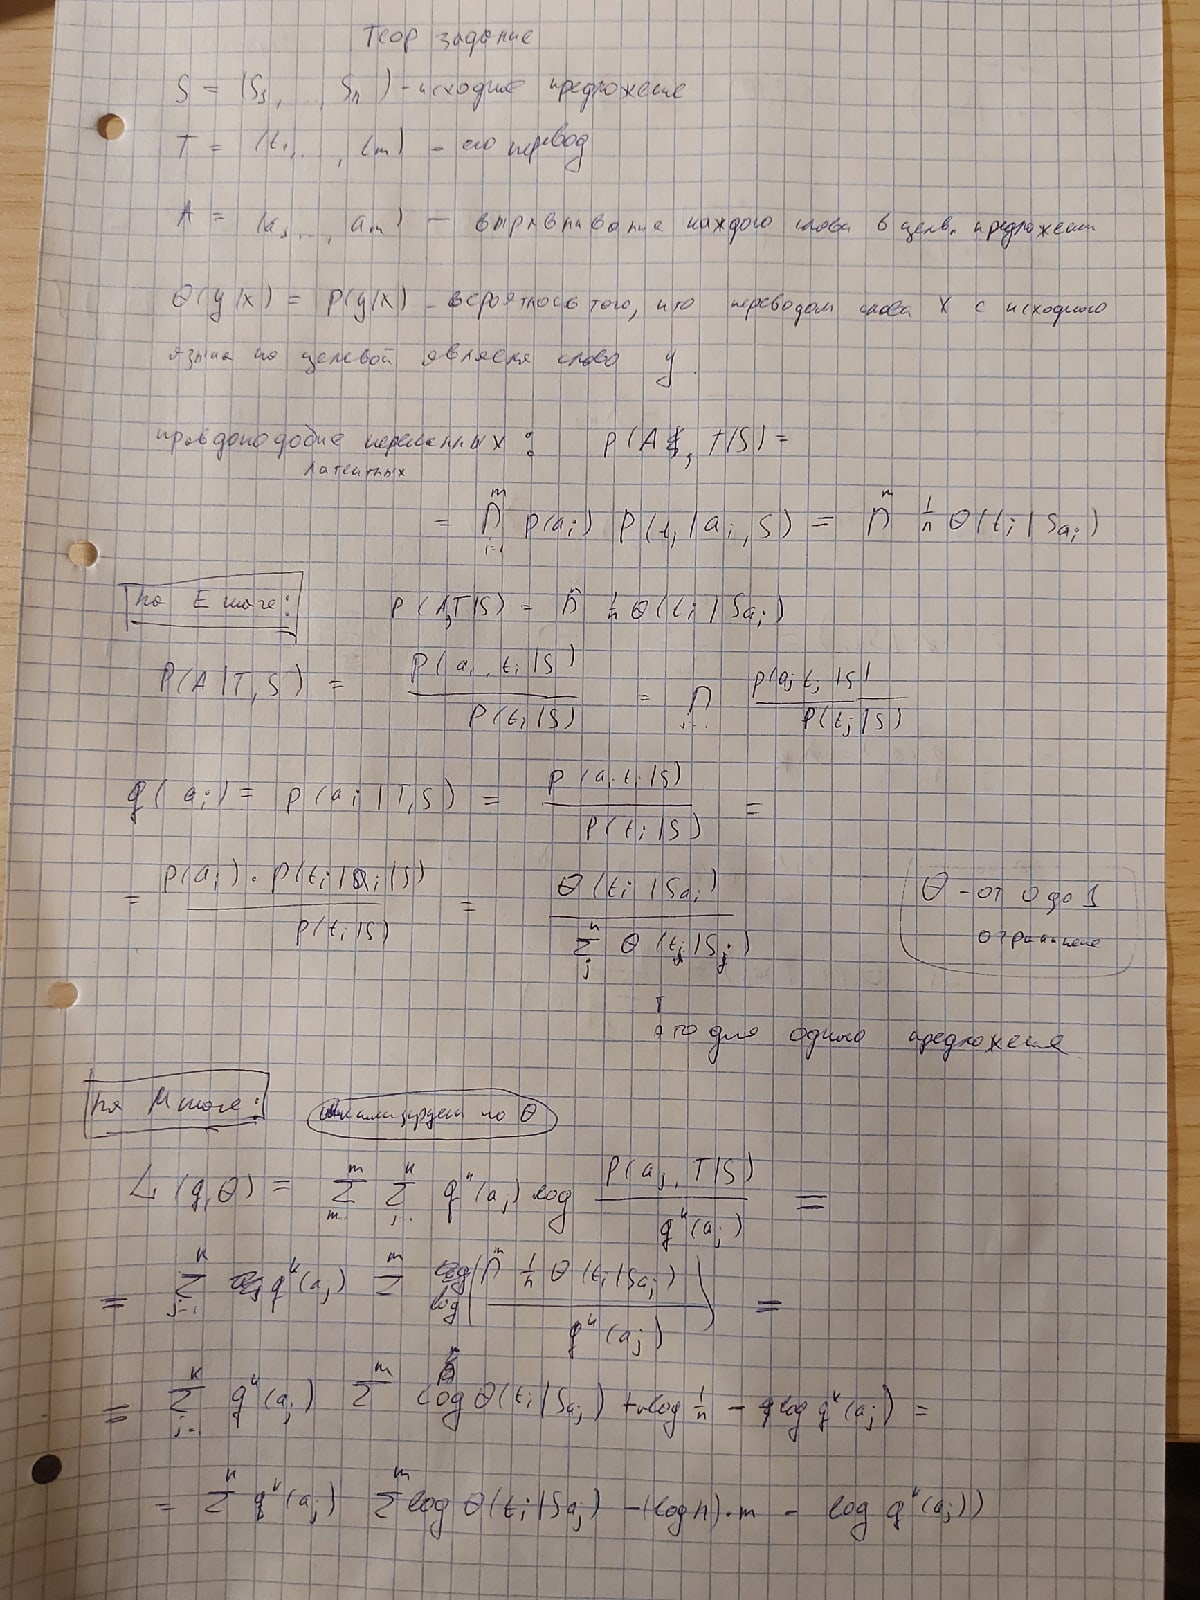

In [119]:
from IPython.display import Image
Image("/content/gdrive/MyDrive/Colab Notebooks/first_page.jpg")

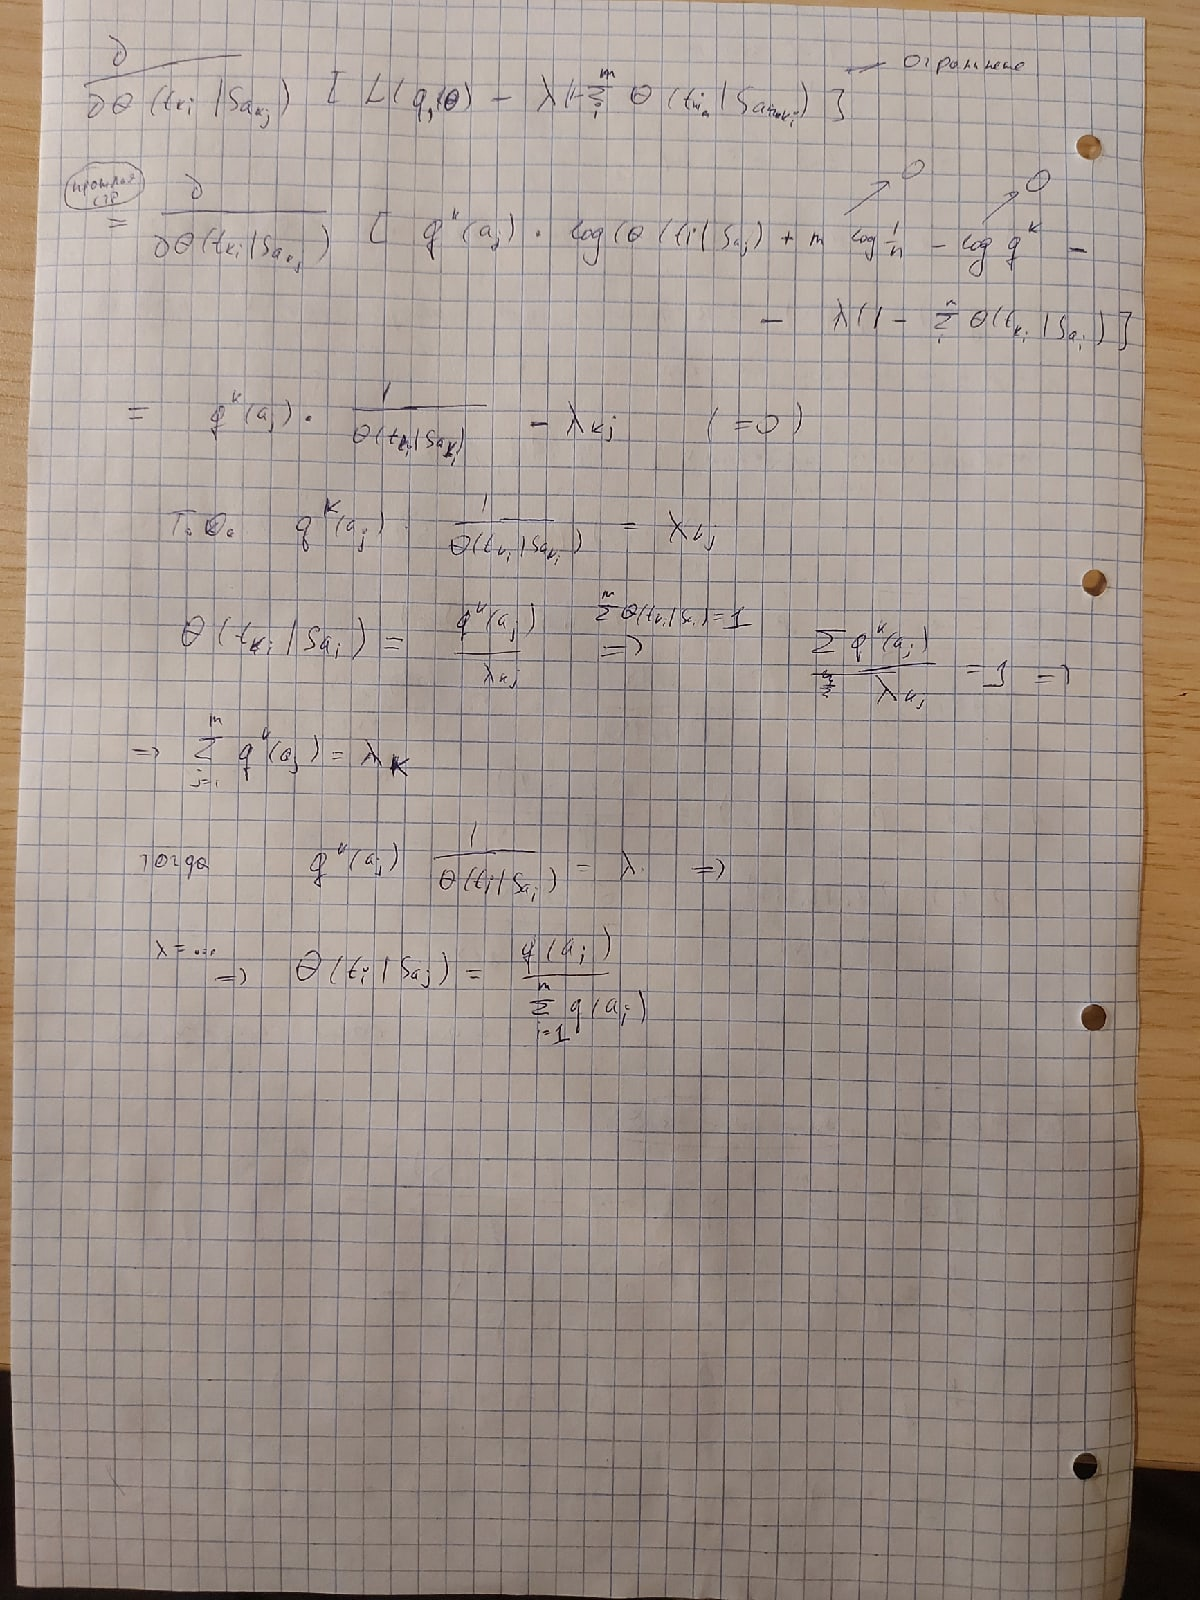

In [120]:
Image("/content/gdrive/MyDrive/Colab Notebooks/second_page.jpg")

**Задание 2. (2 балла)** Реализуйте все методы класса `WordAligner` в соответствии с полученными вами формулами. Протестируйте вашу реализацию через Яндекс.Контест, а здесь обучите модель и посчитайте её AER на истинной разметке. Чтобы предсказать выравнивание для пары предложений в этой модели, следует выбирать в соответствие для слова в целевом предложении с индексом $i$ позицию, соответствующую максимуму апостериорного распределения $p(a_i|T,S)$.

___

**Замечание:** 
* **Полностью проходящая все тесты посылка в этом заданиии дает 1 балл. За хотя бы 1 непройденный тест вы можете получить за это задание максимум 1 балл**
* **Для возможности получения полного балла** ошибка aer должна быть не выше **0.6.** Если получили значение выше -- скорее всего, у вас где-то ошибка

In [106]:
from models import WordAligner

word_aligner = WordAligner(len(t_idx_src), len(t_idx_tgt), 20)
word_aligner.fit(tokenized_sentences);

# ༼つ ಠ益ಠ༽つ ─=≡ΣO))

Заметим, что таблицу вероятностей перевода можно использовать и саму по себе для построения словарей. Пример работы показан ниже: метод хоть и работает, но мягко говоря, неидально — слишком мало данных.

In [111]:
#idx_token_tgt = {index:token for token, index in t_idx_tgt.items()}

In [112]:
#[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['Mr']].argsort()[-3:]]

In [113]:
#[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['Mrs']].argsort()[-3:]]

In [114]:
#[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['water']].argsort()[-3:]]

In [115]:
#[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['depended']].argsort()[-3:]]

In [116]:
#[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['on']].argsort()[-3:]]

**Задание 3. (0.5 балла)** Мы смогли получить матрицу условных вероятностей перевода исходного языка в целевой. Можно ли, пользуясь этой матрицей и ещё какими-то статистиками по параллельному корпусу, получить вероятности перевода целевого языка в исходный?

* Объясните словами принцип работы вашего метода и реализуйте его.
* Также приведите ниже пример его работы, показав пару удачных переводов.

**Подсказка:** какие формулы из теории вероятностей вы знаете? :)

**Задание 4. (0.5 балла)** Визуализируйте полученные выравнивания для нескольких предложений в виде heatmap: по одной из осей располагаются токены исходного текста, по другой — токены его перевода, на пересечении позиций $i$ и $j$ — 0 либо 1 в зависимости от того, является ли в обученной модели $a_i$ равным $j$. Проинтерпретируйте их.

Постройте аналогичный график, но без дискретизации, а визуализируя напрямую апостериорное распределение. Можете ли вы найти ситуации, в которых модель не уверена, переводом какого слова является слово $i$?

**Подсказка:**
* Старайтесь не брать слишком короткие предложения

## Бонусная часть

Заметим, что при задании модели мы сделали довольно сильное предположение о том, что вероятности выбора слова для выравнивания никак не зависят от позиции слова в целевом предложении. Можно сделать эти вероятности настраиваемыми параметрами, получив прямоугольную матрицу $\phi_{m,n}(j|i)=p(a_i=j|m,n)$ для каждой пары длин предложений $m,n$: по-прежнему мы получаем распределение над индексами в исходном предложении. Тогда модель приобретает вид
$$
p(A,T|S)=\prod_{i=1}^m p(a_i|m,n)p(t_i| a_i, S)=\prod_{i=1}^m \phi_{m,n}(a_i|i)\theta(t_i|s_{a_i}).
$$

**Задание 5. (бонус, 1.5 балла)** Выведите шаги EM-алгоритма для этой модели, а также получите выражение для подсчёта нижней оценки правдоподобия.

**Замечание:**
* _Возможные форматы ответа:_ в ячейке ноутбука, отдельно сданная в энитаск pdf c набранными формулами в LaTex, отдельная сданная в энитаск фотография (или скан) рукописного (и разборчивого) вывода.
* Наличие только ответа оценивается **в 0 баллов**
* Наличие неочевидных переходов без пояснений влияет на **баллы в меньшую сторону**

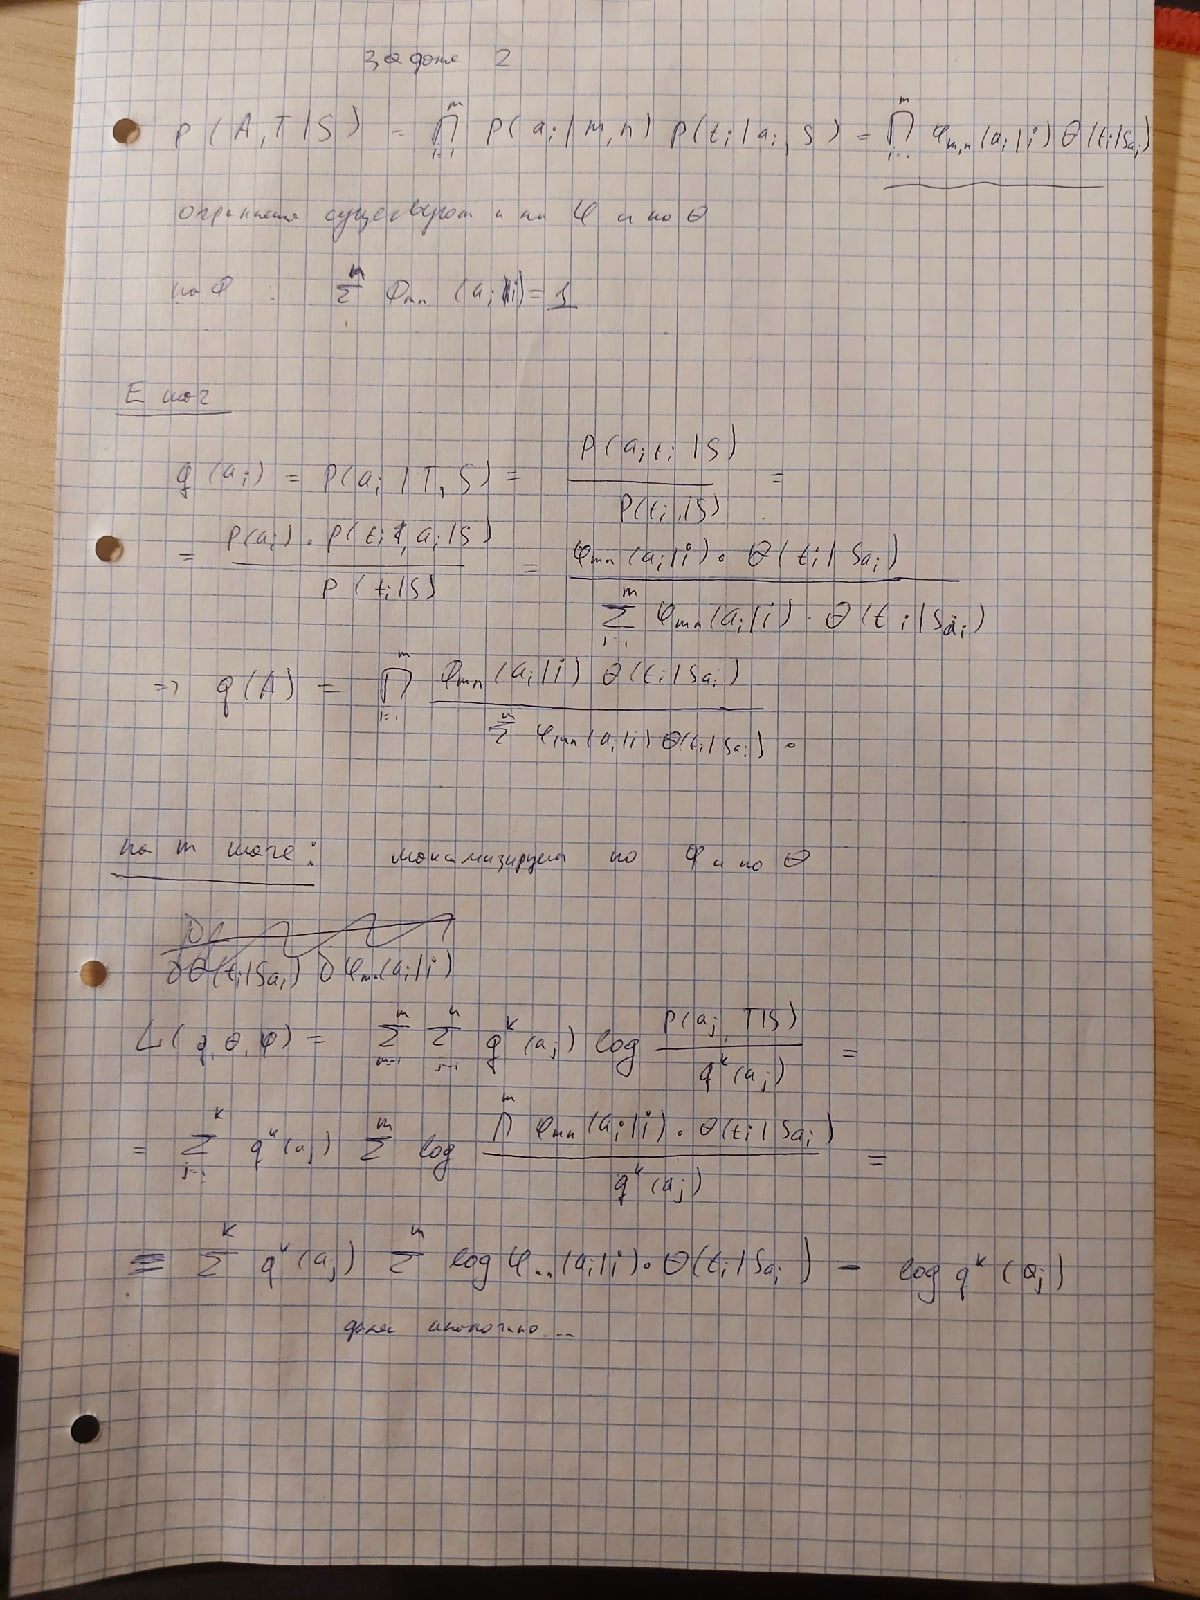

In [121]:
Image("/content/gdrive/MyDrive/Colab Notebooks/dop_page.jpg")